<a href="https://colab.research.google.com/github/Macostik/ML_cource/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models
from keras import layers
from keras import utils
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPooling2D

## Load MNIST data

In [205]:
# Get separate data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Visualize

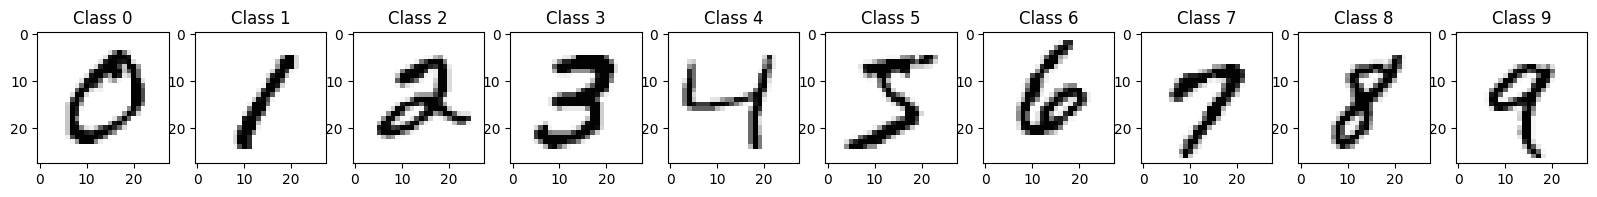

In [206]:
# Plot data set
num_classes = 10

fig, ax = plt.subplots(1, num_classes, figsize=(20,6))

for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="Greys")
  ax[i].set_title(f"Class {i}")

Encode value

In [207]:
# One hot encoding target
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
  print(y_train[i])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Make sure that each target is unique and does not confuse each other

Reshape data to format (n, 28, 28, 1)

In [208]:
img_rows, img_cols = 28, 28

# Reshape data set
# Preprocess the data
X_train = X_train.reshape(-1, img_rows * img_cols)
X_test = X_test.reshape(-1, img_rows * img_cols)

# Convert to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Convert to RGB
X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 784)  -reshaped
X_test: 	(10000, 784)  -reshaped


## Create model

In [209]:
# Instanitiating the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),  # First Dense layer
    Dense(10, activation='softmax')                        # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [210]:
# Hyperparameters
training_epochs = 10 # Total number of training epochs
batch_size = 32 # The learning rate
validation_split=0.2 # Split part of data set

# Configure TensorBoard callback
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs")

# Train the model
model.fit(
    X_train,
    y_train,
    epochs = training_epochs,
    batch_size = batch_size,
    validation_split = validation_split,
    callbacks = [tensorboard_callback]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8627 - loss: 0.4813 - val_accuracy: 0.9581 - val_loss: 0.1495
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9611 - loss: 0.1339 - val_accuracy: 0.9657 - val_loss: 0.1200
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9740 - loss: 0.0895 - val_accuracy: 0.9715 - val_loss: 0.0939
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9815 - loss: 0.0623 - val_accuracy: 0.9740 - val_loss: 0.0876
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9863 - loss: 0.0477 - val_accuracy: 0.9753 - val_loss: 0.0816
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9893 - loss: 0.0374 - val_accuracy: 0.9755 - val_loss: 0.0857
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9912 - loss: 0.0309 - val_accuracy: 0.9737 - val_loss: 0.0918
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9937 - loss: 0.0224 

## Evaluate model

In [211]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0321, accuracy: 99.1383%
Evaluating on testing set...
loss=0.0932, accuracy: 97.5200%


The accuracy value is almost equal to 1, loss value 0.09 for test and 0.03 for train model are very good

## Test the current model

In [212]:
# Pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(f"Softmax predicted probability: {y_pred}")
print(f"Probability based answer: {y_pred_classes}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Softmax predicted probability: [[3.2559336e-10 1.3459833e-10 4.5634128e-09 ... 9.9998981e-01
  3.3135166e-07 6.1117760e-07]
 [7.7134812e-11 8.4352519e-05 9.9991482e-01 ... 1.7332098e-15
  1.0739806e-07 1.1253452e-16]
 [5.9738062e-07 9.9835527e-01 1.1021126e-04 ... 7.9102017e-04
  6.7556312e-04 5.1693513e-07]
 ...
 [4.5780998e-18 7.0357182e-15 1.6808474e-15 ... 2.6046496e-07
  1.1514418e-09 1.4040208e-07]
 [8.5158167e-16 1.0025436e-15 8.3475578e-19 ... 1.3399260e-14
  8.3660421e-09 7.2221809e-16]
 [1.0678469e-09 1.6167765e-15 1.4634324e-08 ... 1.3506509e-15
  2.8328292e-13 4.5749318e-11]]
Probability based answer: [7 2 1 ... 4 5 6]


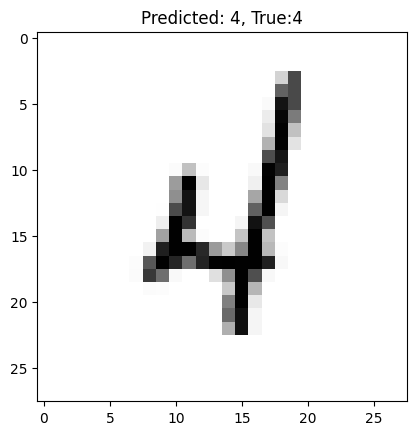

In [213]:
# Select the random element from the data set
random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

# Target value
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

# Predicted class
y_sample_pred_class = y_pred_classes[random_num]

plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="Greys");

Our model predicted the random value, which equals 4 correctly


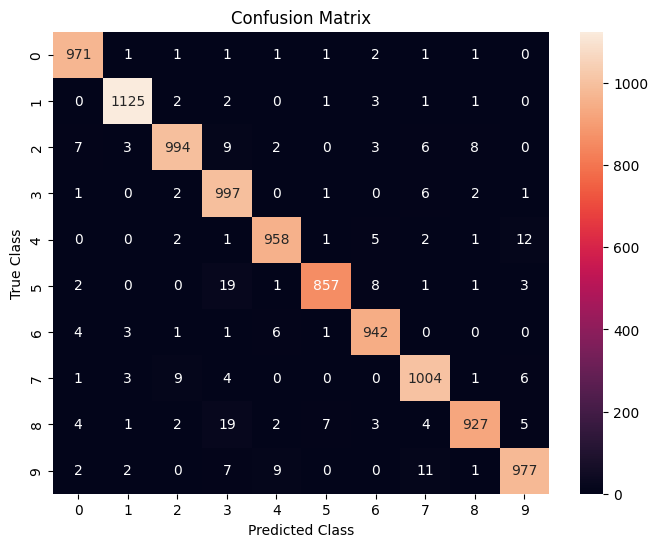

In [214]:
# PLot confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax)
ax.set_xlabel("Predicted Class")
ax.set_ylabel("True Class")
ax.set_title("Confusion Matrix");

In the confusion matrix plot, we can observe that value 5 is the more difficult value to predict for the current model.

## Conclusion:
We experimented with the MNIST data set successfully. Built the Sequential model with two neuron shapes, trained it, and got a good accuracy value. Save all trained and validation logs locally. Tested it with random value, and it works quite well.